# Figures

In [1]:
setwd("/Users/peterwu/Dropbox/HuLab/microbial_phenotype_data_mining/Nichols_Data_mining/")
source("Nichols_preload.R")

Loading required package: pacman



## Coannotation barplots

In [2]:
## Data obj preparation
#------------------------------------------------------------------------------------------------------------
noOfGenes=function(df,annotLogical){
  df[annotLogical,c("strain1","strain2")] %>% as.matrix %>% as.vector %>% unique %>% length
}

df=strain1strain2_allAnnotations_allDistances

Pwy=noOfGenes(df,as.logical(df$Pwy))
pcomplex=noOfGenes(df,as.logical(df$pcomplex))
operon=noOfGenes(df,as.logical(df$operon))
regulator=noOfGenes(df,as.logical(df$regulator))
kegg_modules=noOfGenes(df,as.logical(df$kegg_modules))

PwyANDPcomplex=noOfGenes(df,as.logical(df$Pwy & df$pcomplex))
all5=noOfGenes(df,as.logical(df$Pwy & df$pcomplex & df$operon & df$regulator & df$kegg_modules))


sets=c(Pwy=Pwy,pcomplex=pcomplex,operon=operon,regulator=regulator,kegg_modules=kegg_modules,PwyANDPcomplex=PwyANDPcomplex,all5=all5)

names(sets)=c("Pathway","Protein complex","Operon","Regulon","KEGG modules","Pathway & Protein complex","All annotation sets")
#------------------------------------------------------------------------------------------------------------


In [3]:
#A bargraph containing no. of genes involved in co-annotated pairs
#================================================================================================================
name=names(sets)

inputDF=data.frame(name=factor(name,levels=name),
                   count=sets
)

Cols=c("#56B4E9","#F3518A","#24D7B7","#267A6B","#3533A7") 


p1=ggplot(data=inputDF[1:5,],aes(x=name,y=count,fill=name))+geom_bar(stat="identity")+
  theme_minimal()+
  theme(text=element_text(size=20),axis.text.x=element_blank())+
  labs(x="",y="No. of co-annotated genes",aesthetic='custom text',fill="Annotation set")+  
  scale_fill_manual(values=Cols)+
  theme(legend.text=element_text(size=20),
        axis.title=element_text(size=20))+
  ylim(0, 4000)


Cols=c("#BE70EA","#09D38A") 

p2=ggplot(data=inputDF[6:7,],aes(x=name,y=count,fill=name))+geom_bar(stat="identity")+
  theme_minimal()+
  theme(text=element_text(size=20),axis.text.x=element_blank())+
  labs(x="",y="",aesthetic='custom text',fill="Annotation set")+  #y label is specified in the above plot
  scale_fill_manual(values=Cols)+
  theme(legend.text=element_text(size=20),
        axis.title=element_text(size=20))+
  ylim(0, 4000)
#================================================================================================================


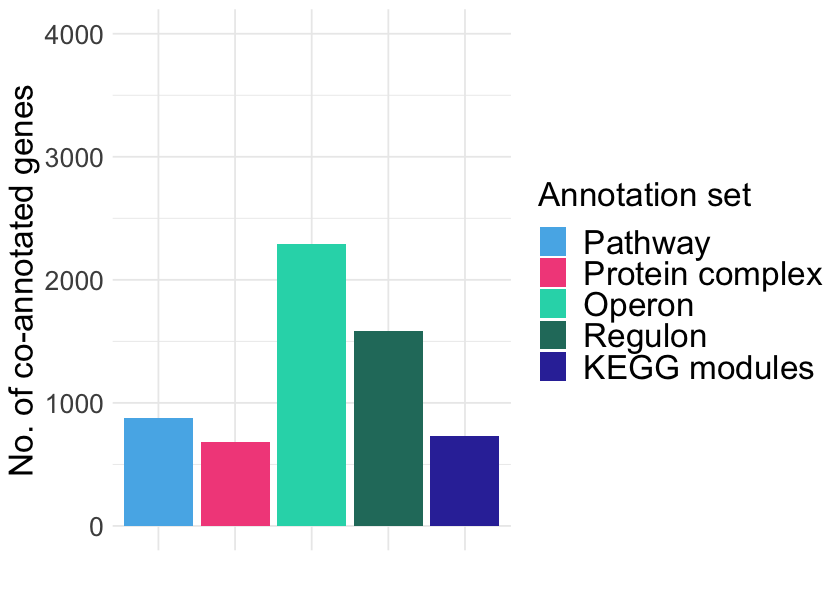

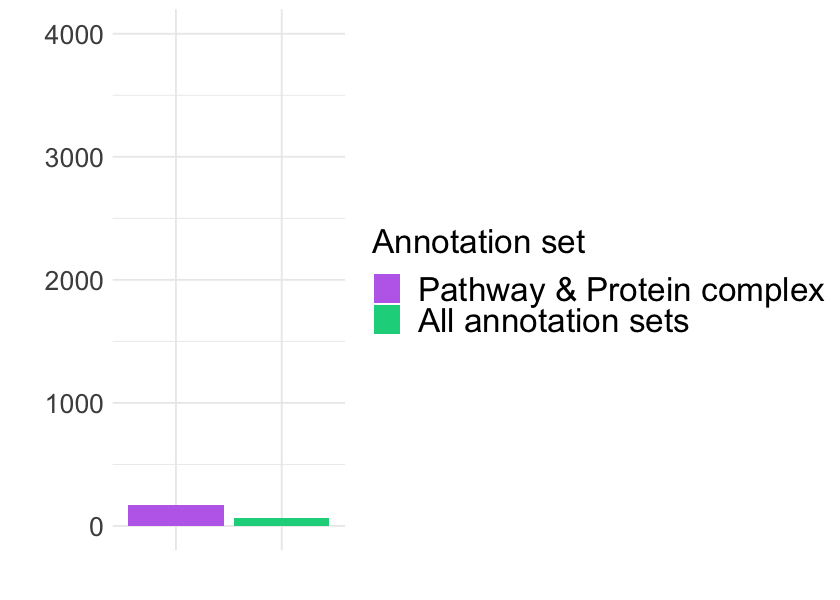

In [5]:
options(repr.plot.width = 7, repr.plot.height = 5)
p1
p2

#paper fig should be saved using pdf()
#grid.newpage()
#grid.draw(cbind(ggplotGrob(p1), ggplotGrob(p2), size = "last")) #ref: https://gist.github.com/tomhopper/faa24797bb44addeba79

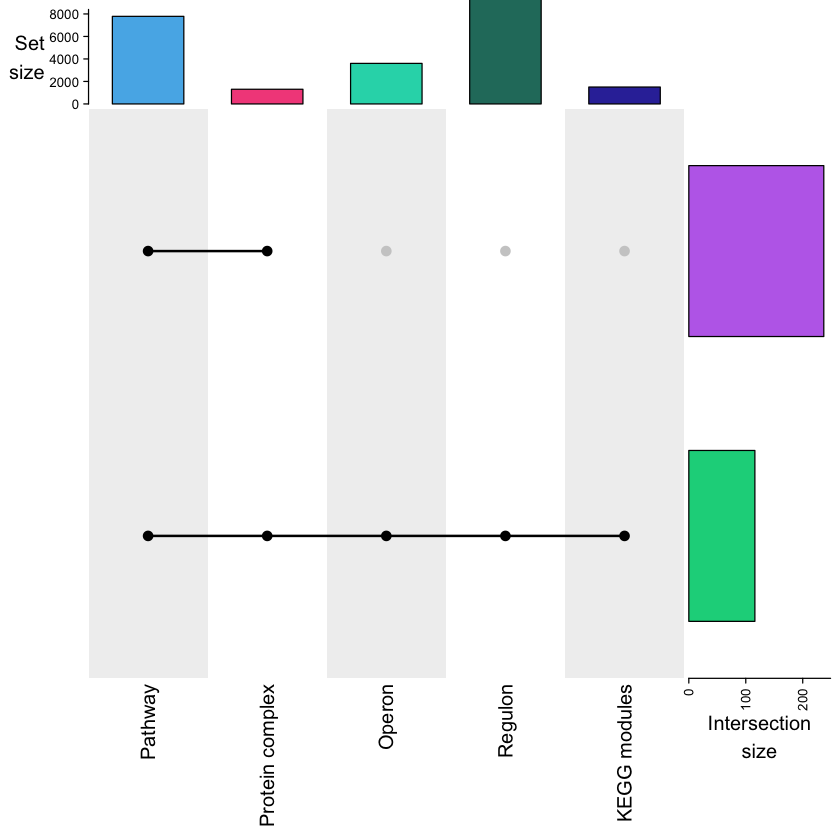

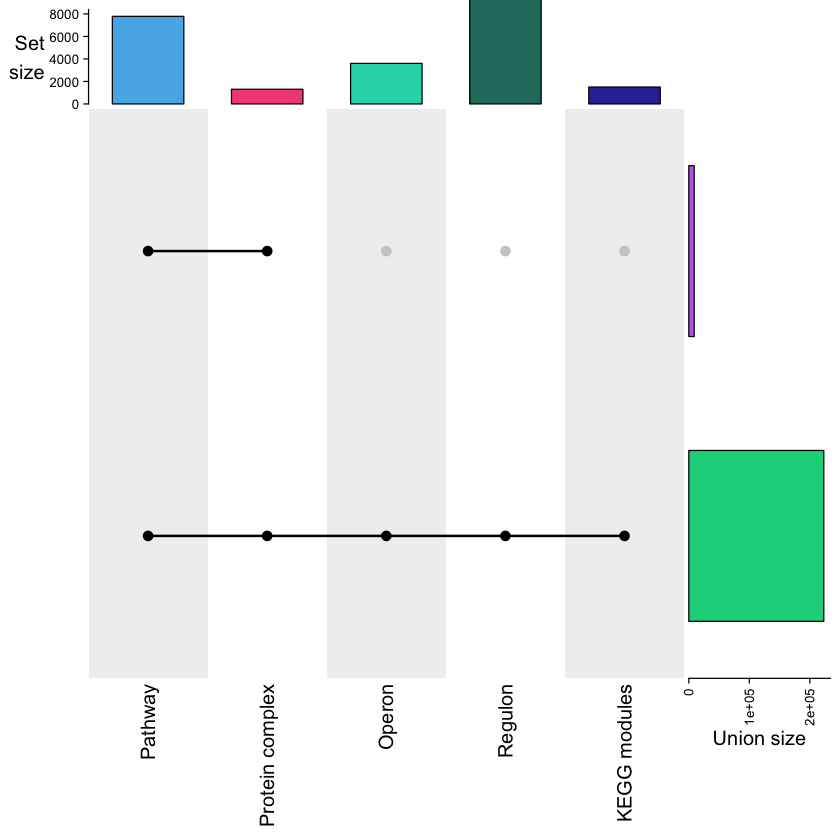

In [2]:
#Upset graph 
##Note: this implementation is an enhancement in the ComplexHeatmap package based on the original UpsetR package
##In the original UpsetR package it implements "distinct mode" while in ComplexHeatmap package 
##there are 2 modes added: intersection, union


library(ComplexHeatmap) #enhancement of UpSetR is in this package: https://jokergoo.github.io/ComplexHeatmap-reference/book/upset-plot.html
df=strain1strain2_allAnnotations_allDistances


#Intersection
pairs=1:7914231
Pwy=pairs[as.logical(df$Pwy)]
pcomplex=pairs[as.logical(df$pcomplex)]
operon=pairs[as.logical(df$operon)]
regulator=pairs[as.logical(df$regulator)]
kegg_modules=pairs[as.logical(df$kegg_modules)]


sets=list(Pwy=Pwy,pcomplex=pcomplex,operon=operon,regulator=regulator,kegg_modules=kegg_modules)

names(sets)=c("Pathway","Protein complex","Operon","Regulon","KEGG modules")


m=make_comb_mat(sets, mode = "intersect")
m=m[,c(31,6)]

p1=UpSet(t(m),set_order = 1:length(sets),comb_order = 2:1,
      right_annotation = upset_right_annotation(t(m), gp = gpar(fill = c("#09D38A","#BE70EA"))),
      top_annotation = upset_top_annotation(t(m),gp = gpar(fill = c("#56B4E9","#F3518A","#24D7B7","#267A6B","#3533A7")),ylim = c(0, 8000))
      )



#Union
pairs=1:7914231
Pwy=pairs[as.logical(df$Pwy)]
pcomplex=pairs[as.logical(df$pcomplex)]
operon=pairs[as.logical(df$operon)]
regulator=pairs[as.logical(df$regulator)]
kegg_modules=pairs[as.logical(df$kegg_modules)]


sets=list(Pwy=Pwy,pcomplex=pcomplex,operon=operon,regulator=regulator,kegg_modules=kegg_modules)

names(sets)=c("Pathway","Protein complex","Operon","Regulon","KEGG modules")


m=make_comb_mat(sets, mode = "union")
m=m[,c(31,6)]

p2=UpSet(t(m),set_order = 1:length(sets),comb_order = 2:1,
      right_annotation = upset_right_annotation(t(m), gp = gpar(fill = c("#09D38A","#BE70EA"))),
      top_annotation = upset_top_annotation(t(m),gp = gpar(fill = c("#56B4E9","#F3518A","#24D7B7","#267A6B","#3533A7")),ylim = c(0, 8000))
)

p1
p2


## Violin plots

In [36]:
distance_column="pcc"
y_lab="|PCC|"


##Pwy
coAnnotated= ( strain1strain2_allAnnotations_allDistances$Pwy==1 )
pwy_abs_pcc=1-strain1strain2_allAnnotations_allDistances[[distance_column]][coAnnotated] #I am converting the |PCC| based distance back to just |PCC|


##pcomplex
coAnnotated= ( strain1strain2_allAnnotations_allDistances$pcomplex==1 )
pcomplex_abs_pcc=1-strain1strain2_allAnnotations_allDistances[[distance_column]][coAnnotated]

##Pwy and pcomplex 
coAnnotated= ( rowSums(strain1strain2_allAnnotations_allDistances[,c("Pwy","pcomplex")])==2 )
pwyANDpcomplex_abs_pcc=1-strain1strain2_allAnnotations_allDistances[[distance_column]][coAnnotated]


#all_annotSet
coAnnotated= ( rowSums(strain1strain2_allAnnotations_allDistances[,c("Pwy","pcomplex","operon","regulator","kegg_modules")])==5 )
all_annotSet_abs_pcc=1-strain1strain2_allAnnotations_allDistances[[distance_column]][coAnnotated]


# all
All=1-strain1strain2_allAnnotations_allDistances[[distance_column]]



# create dfs for ggplots
df_all=data.frame(all=All)
df1 = data.frame(pwy=pwy_abs_pcc)
df2 = data.frame(ptcom=pcomplex_abs_pcc)
df3=data.frame(pwyANDpcomplex=pwyANDpcomplex_abs_pcc)
df4=data.frame(all_annotSet=all_annotSet_abs_pcc)


xlabs=c("All gene pairs","Same EcoCyc pathways","Same EcoCyc protein\n complexes","Same EcoCyc pathways and\n protein complexes",
        "Intersection of 5\n annotation sets")

p=ggplot() +
  geom_violin(data = df_all,aes(xlabs[1],all)) +
  geom_boxplot(data = df_all,aes(xlabs[1],all),width=0.1,outlier.shape = NA)+
  geom_violin(data = df1,aes(xlabs[2],pwy)) +
  geom_boxplot(data = df1,aes(xlabs[2],pwy),width=0.1,outlier.shape = NA)+
  geom_violin(data = df2,aes(xlabs[3],ptcom))+
  geom_boxplot(data = df2,aes(xlabs[3],ptcom),width=0.1,outlier.shape = NA)+
  geom_violin(data = df3,aes(xlabs[4],pwyANDpcomplex))+
  geom_boxplot(data = df3,aes(xlabs[4],pwyANDpcomplex),width=0.1,outlier.shape = NA)+
  geom_violin(data = df4,aes(xlabs[5],all_annotSet))+
  geom_boxplot(data = df4,aes(xlabs[5],all_annotSet),width=0.1,outlier.shape = NA)+
  scale_x_discrete("",limits=xlabs)+ 
  #I want the x axis to be empty. And if I don't use this, the order is not right
  scale_y_continuous(y_lab)
#==============================================================================================================================

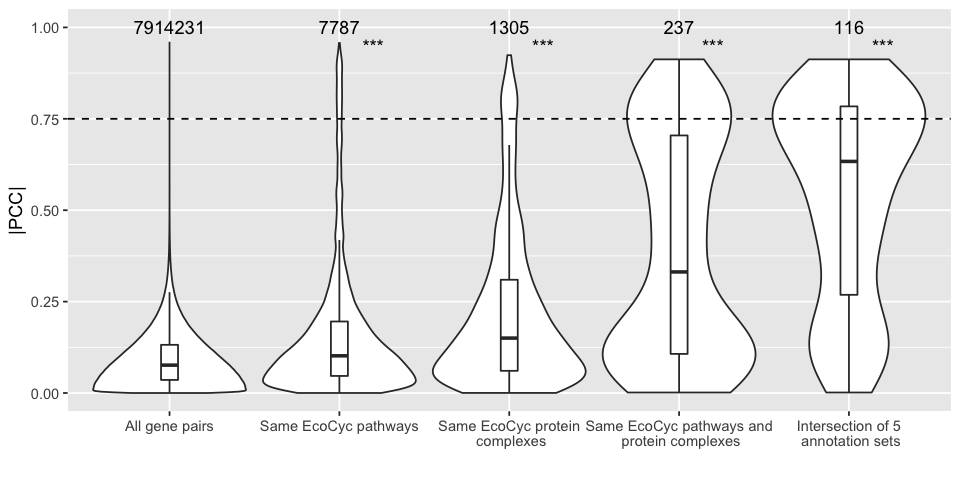

In [37]:
options(repr.plot.width = 8, repr.plot.height = 4)


p+
#annotate(geom="text", x=0.5, y=1, label="No. of pairs: ",color="black",size=2)+

annotate(geom="text", x=1, y=1, label=dim(df_all)[1],color="black")+
annotate(geom="text", x=2, y=1, label=dim(df1)[1],color="black")+
annotate(geom="text", x=3, y=1, label=dim(df2)[1],color="black")+
annotate(geom="text", x=4, y=1, label=dim(df3)[1],color="black")+
annotate(geom="text", x=5, y=1, label=dim(df4)[1],color="black")+

annotate(geom="text", x=2.2, y=.95, label="***",color="black")+
annotate(geom="text", x=3.2, y=.95, label="***",color="black")+
annotate(geom="text", x=4.2, y=.95, label="***",color="black")+
annotate(geom="text", x=5.2, y=.95, label="***",color="black")+

geom_hline(yintercept=0.75,linetype="dashed") #this is an empirical cutoff
 

In [47]:
distance_column="mi_ternary"
y_lab="Mutual Information"


##Pwy
coAnnotated= ( strain1strain2_allAnnotations_allDistances$Pwy==1 )
pwy=1-strain1strain2_allAnnotations_allDistances[[distance_column]][coAnnotated] #I am converting distance back to similarity


##pcomplex
coAnnotated= ( strain1strain2_allAnnotations_allDistances$pcomplex==1 )
pcomplex=1-strain1strain2_allAnnotations_allDistances[[distance_column]][coAnnotated]

##Pwy and pcomplex 
coAnnotated= ( rowSums(strain1strain2_allAnnotations_allDistances[,c("Pwy","pcomplex")])==2 )
pwyANDpcomplex=1-strain1strain2_allAnnotations_allDistances[[distance_column]][coAnnotated]


#all_annotSet
coAnnotated= ( rowSums(strain1strain2_allAnnotations_allDistances[,c("Pwy","pcomplex","operon","regulator","kegg_modules")])==5 )
all_annotSet=1-strain1strain2_allAnnotations_allDistances[[distance_column]][coAnnotated]


# all
All=1-strain1strain2_allAnnotations_allDistances[[distance_column]]



# create dfs for ggplots
df_all=data.frame(all=All)
df1 = data.frame(pwy=pwy)
df2 = data.frame(ptcom=pcomplex)
df3=data.frame(pwyANDpcomplex=pwyANDpcomplex)
df4=data.frame(all_annotSet=all_annotSet)


xlabs=c("All gene pairs","Same pathways","Same protein\n complexes","Same pathways and\n protein complexes",
        "Intersection of 5\n annotation sets")

p2=ggplot() +
  geom_violin(data = df_all,aes(xlabs[1],all)) +
  geom_boxplot(data = df_all,aes(xlabs[1],all),width=0.1,outlier.shape = NA)+
  geom_violin(data = df1,aes(xlabs[2],pwy)) +
  geom_boxplot(data = df1,aes(xlabs[2],pwy),width=0.1,outlier.shape = NA)+
  geom_violin(data = df2,aes(xlabs[3],ptcom))+
  geom_boxplot(data = df2,aes(xlabs[3],ptcom),width=0.1,outlier.shape = NA)+
  geom_violin(data = df3,aes(xlabs[4],pwyANDpcomplex))+
  geom_boxplot(data = df3,aes(xlabs[4],pwyANDpcomplex),width=0.1,outlier.shape = NA)+
  geom_violin(data = df4,aes(xlabs[5],all_annotSet))+
  geom_boxplot(data = df4,aes(xlabs[5],all_annotSet),width=0.1,outlier.shape = NA)+
  scale_x_discrete("",limits=xlabs)+ 
  #I want the x axis to be empty. And if I don't use this, the order is not right
  scale_y_continuous(y_lab)

In [16]:
#summary(df_all) #Median: 0.00 #Mean: 0.00062
#summary(df1) #Median: 0.00 #Mean: 0.014
#summary(df2) #Median: 0.00 #Mean: 0.014
#summary(df3) #Median: 4.146e-05 #Mean: 0.039
#summary(df4) #Median: 0.035 #Mean: 0.057

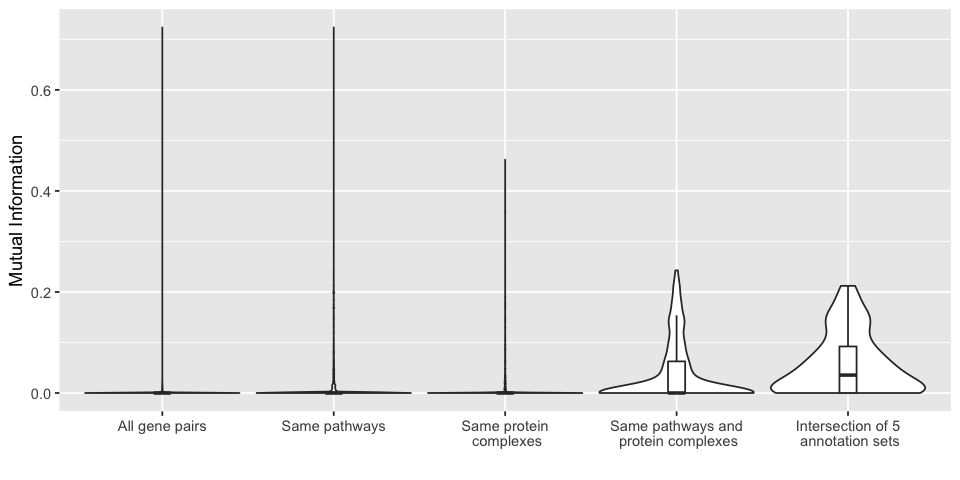

In [17]:
options(repr.plot.width = 8, repr.plot.height = 4)
p2

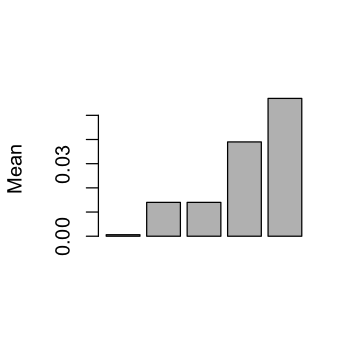

In [18]:
#bargraph for the means
options(repr.plot.width = 3, repr.plot.height = 3)
barplot(c(0.00062,0.014,0.014,0.039,0.057),ylab="Mean")

In [5]:
#Violin using GO annotations

get_violin=function(similarity,cutoffIndex,xlabs){
  
  df=strain1strain2_allAnnotations_allDistances
  mean(is.na(df$Wang_BP)) # ~56% of the similarity are NA
  
  ##the first box
  #------------------------------------------------
  sorted_WangBP=df$Wang_BP[order(df[[similarity]])]
  sorted_WangBP_naRemoved=sorted_WangBP[!is.na(sorted_WangBP)]
  #------------------------------------------------
  
  ##the second box
  #------------------------------------------------
  sorted_WangBP_subset=sorted_WangBP[1:cutoffIndex]
  sorted_WangBP_subset_naRemoved=sorted_WangBP_subset[!is.na(sorted_WangBP_subset)]
  #------------------------------------------------
  
  
  df_all=data.frame(All=sorted_WangBP_naRemoved)
  df1=data.frame(aboveCutoff=sorted_WangBP_subset_naRemoved)
  
  
    ggplot() +
    geom_violin(data = df_all,aes(xlabs[1],All)) +
    geom_boxplot(data = df_all,aes(xlabs[1],All),width=0.1,outlier.shape = NA)+ #outlier.shape decides the shape of outliers. Here I don't let them show
    geom_violin(data = df1,aes(xlabs[2],aboveCutoff)) +
    geom_boxplot(data = df1,aes(xlabs[2],aboveCutoff),width=0.1,outlier.shape = NA)+
    scale_x_discrete("",limits=xlabs)+ 
    #I want the x axis to be empty. And if I don't use this, the order is not right
    scale_y_continuous("Semantic similarity")+
    theme(text=element_text(size=25), 
          axis.text.y=element_text(size=25),
          axis.title=element_text(size=25))
}

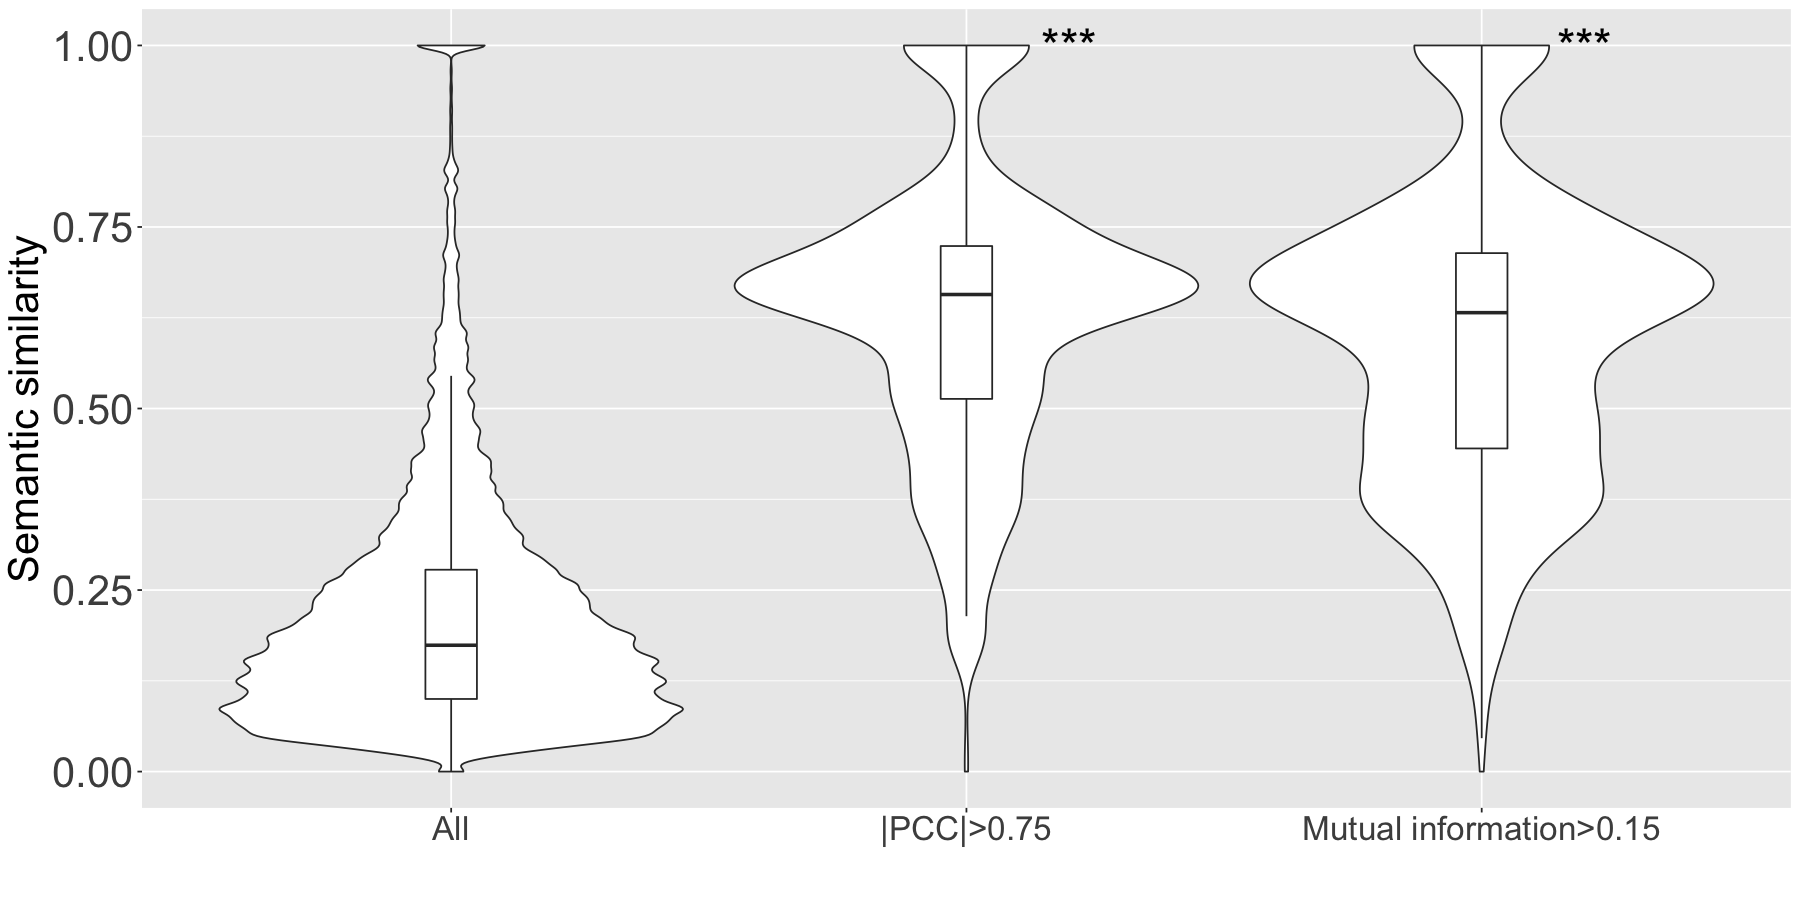

In [6]:
options(repr.plot.width = 15, repr.plot.height = 15/2)

#get p5+p6
xlabs=c("All","|PCC|>0.75","Mutual information>0.15")
cutoffIndex=1274



df=strain1strain2_allAnnotations_allDistances
#mean(is.na(df$Wang_BP)) # ~56% of the similarity are NA

##the first box
#------------------------------------------------
box1=df$Wang_BP[!is.na(df$Wang_BP)]
#------------------------------------------------

##the second box
#------------------------------------------------
similarity="pcc"
box2=df$Wang_BP[order(df[[similarity]])][1:cutoffIndex]
box2=box2[!is.na(box2)]
#------------------------------------------------

##the third box
#------------------------------------------------
similarity="mi_ternary"
box3=df$Wang_BP[order(df[[similarity]])][1:cutoffIndex]
box3=box3[!is.na(box3)]
#------------------------------------------------


df_all=data.frame(All=box1)
df1=data.frame(aboveCutoff1=box2)
df2=data.frame(aboveCutoff2=box3)


p7=ggplot() +
geom_violin(data = df_all,aes(xlabs[1],All)) +
geom_boxplot(data = df_all,aes(xlabs[1],All),width=0.1,outlier.shape = NA)+ #outlier.shape decides the shape of outliers. Here I don't let them show
geom_violin(data = df1,aes(xlabs[2],aboveCutoff1)) +
geom_boxplot(data = df1,aes(xlabs[2],aboveCutoff1),width=0.1,outlier.shape = NA)+
geom_violin(data = df2,aes(xlabs[3],aboveCutoff2)) +
geom_boxplot(data = df2,aes(xlabs[3],aboveCutoff2),width=0.1,outlier.shape = NA)+
scale_x_discrete("",limits=xlabs)+ 
#I want the x axis to be empty. And if I don't use this, the order is not right
scale_y_continuous("Semantic similarity")+
theme(text=element_text(size=25), 
      axis.text.y=element_text(size=25),
      axis.title=element_text(size=25))

p7+
annotate(geom="text", x=2.2, y=1, label="***",color="black",size=10)+
annotate(geom="text", x=3.2, y=1, label="***",color="black",size=10)

## Sensitivity & precision graphs

### Definitions

In [12]:
#functions to get confusion matrix based on annot and similarity
get_confusionMatrix=function(annot,similarity,seed=9){   
    df=strain1strain2_allAnnotations_allDistances[,c(annot,similarity)]
        if(length(annot)>=2){
            coannotation=(rowSums(df[,annot])>=1)
            #coannotation=(rowSums(df[,annot])>=length(annot)) this is A&B&...
            cumsum_=cumsum(coannotation[order(df[,similarity])])
            return(confusionMatrix_metrics(cumsum_,seed=seed))
        } 
    
    cumsum_=cumsum(df[,annot][order(df[,similarity])])
    return(confusionMatrix_metrics(cumsum_,seed=seed))
}

In [8]:
#This gets precison using the same combination of annotations as the violin plots
similarity="pcc"
subset=1000

#precalculate and subset to prevent memory problem
con1=get_confusionMatrix("Pwy",similarity)[1:subset,]
con2=get_confusionMatrix("pcomplex",similarity)[1:subset,]
con3=get_confusionMatrix(c("Pwy","pcomplex"),similarity)[1:subset,]
con4=get_confusionMatrix(c("Pwy","pcomplex","operon","regulator","kegg_modules"),similarity)[1:subset,]


annot_list=list(con1,con2,con3,con4)
names(annot_list)=c("Same pathways","Same protein complexes","Same pathways or protein complexes",
        "Union of 5 annotation sets")



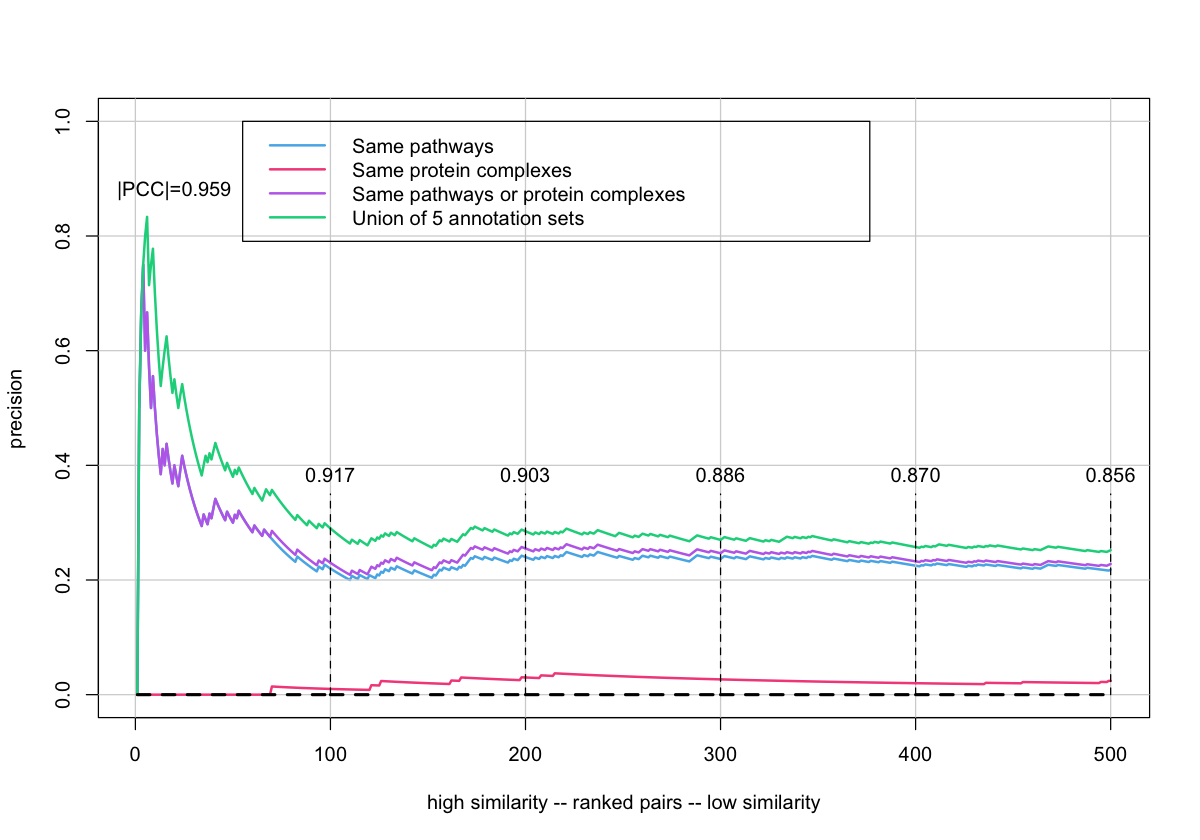

In [28]:
samples=1:500
cols=c("#56B4E9","#F3518A","#BE70EA","#09D38A")
metric="precision"
random_metric=paste0("random_",metric)
x_lab="high similarity -- ranked pairs -- low similarity"
y=metric
ylim=c(0,1)
xlim=c(1,max(samples))
lwd=2

options(repr.plot.width = 10, repr.plot.height = 7)


for(i in seq(annot_list)){
    if(i==1){
      plot(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,type='l',col=cols[i],
           ylim=ylim,xlim=xlim,lwd = lwd) 
    grid(lty='solid')
    }else{
      lines(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,col=cols[i],lwd = lwd) 
    }
    

}

legend(55, 1, legend=names(annot_list),
       col=cols, lty=1,lwd = lwd, cex=1) 

#add the negative control
lines(samples,annot_list[[1]][[random_metric]][samples],col='black',lty = 'dashed',lwd=2.5)

#add the annotations Dr. Siegele wants

##|PCC| for the 1st pair and 100, 200, 300... : 
##(1-sort(strain1strain2_allAnnotations_allDistances$pcc))[c(1,100,200,300,400,500)] %>% round(3)
##0.959 0.917 0.903 0.886 0.870 0.856


text(x=20,y=0.85,labels="|PCC|=0.959",pos=3)
text(x=100,y=0.35,labels="0.917",pos=3)
text(x=200,y=0.35,labels="0.903",pos=3)
text(x=300,y=0.35,labels="0.886",pos=3)
text(x=400,y=0.35,labels="0.870",pos=3)
text(x=500,y=0.35,labels="0.856",pos=3)

segments(100,0,100,0.35,lty=2)
segments(200,0,200,0.35,lty=2)
segments(300,0,300,0.35,lty=2)
segments(400,0,400,0.35,lty=2)
segments(500,0,500,0.35,lty=2)


#I have intuition that this graph should use "or" instead of "and". 
#Reasoning (junior high school math): using "and" will always drive down the precison, while if "or" is used:
##1. if annotations are good, precision goes up
##2. if annotations are bad, precision doesn't improve

## With/Without minimal media

In [9]:
#generate result of binary classification problem, a sql table (remember to keep track of the original id)
load("Data/uniqueChemIndex.RData")
TF=( names(uniqueChemIndex) %in% c("NH4Cl (MOPS)","Iron excess-FeSO4","Iron starvation-FeSO4","Acetate (M9)",
                                   "Glucosamine (M9)","Glucose (M9)","Glycerol (M9)","Maltose (M9)","N-acetyl Glucosamine","Succinate (M9)") )
used_cond=names(uniqueChemIndex)[!TF]
cond_indices=unlist(uniqueChemIndex[used_cond])

#experiments:

##do corr VS annot excluding the minial media condition

##(I suspect this will give us a better result. There are only 10 minimal media conditions out of 324 conditions)

##correlate genes only based on the minimal media condition

#(!)Need to add mi, spearman, ternary_mi for non minimal media only

cor_matrix=cor(t(All_Data_NAimputed[,cond_indices])) ##warning: sd is 0 => might be scores for some strains are all 0
##anyIncomplete(cor_matrix) #verify that NAs have been generated
cor_matrix[is.na(cor_matrix)]=-9 #change where cor=NA to -9 
dist_=as.dist(cor_matrix)
new_cor_table=meltANDsort_dist(dist_)
new_cor_table=new_cor_table[!(new_cor_table[,3]==-9),] 
new_cor_table$object_1=as.numeric(new_cor_table$object_1)
new_cor_table$object_2=as.numeric(new_cor_table$object_2)
new_cor_table[,3]=1-abs(new_cor_table[,3]) #change pcc to pcc based distance
names(new_cor_table)[1:2]=c("strain1","strain2")

##===output pcc table===================================================
#currentDir=dirname(rstudioapi::getActiveDocumentContext()$path)
#png(filename=paste(currentDir,"_no_minimal_cor.png",sep="/"))
#hist(new_cor_table[,3],xlab="PCC",main="")
#dev.off()
#=======================================================================

##calculate cumsum based on pcc

table_1=strain1strain2_allAnnotations_allDistances
load("Data/strain1strain2_allDistances_noMinimalMedia.RData")
table_2=left_join(strain1strain2_allDistances_noMinimalMedia,strain1strain2_allAnnotations_allDistances[,1:7],by=c("strain1","strain2"))

In [56]:
get_confusionMatrix=function(df,annot,similarity,seed=9){   
  
  if(length(similarity)!=dim(df)[1]){ #if new similarity is in the the table, just retreive from the table
    similarity=df[,similarity]
    }
  df=cbind(df[,annot],similarity)
  
  if(length(annot)>=2){
    coannotation=(rowSums(df[,annot])>=1)
    #coannotation=(rowSums(df[,annot])>=length(annot)) this is A&B&...
    cumsum_=cumsum(coannotation[order(df[,dim(df)[2]])])
    return(confusionMatrix_metrics(cumsum_,seed=seed))
  } 
  
  cumsum_=cumsum(df[,1][order(df[,2])])
  return(confusionMatrix_metrics(cumsum_,seed=seed))
}

graph_corr_annot=function(metric,similarity,samples,subset,cols,ylim,xlim,lwd,annot_list,annot_list_name){
    
options(repr.plot.width = 10, repr.plot.height = 7)    
    
for(similarity_ in similarity){
    
    x_lab=paste0("high similarity -- ranked pairs -- low similarity (",similarity_,")")
    for(metric_ in metric){
        
        random_metric=paste0("random_",metric_)
        for(j in seq(annot_list)){
  
          #precalculate and subset to prevent memory problem
          con1=get_confusionMatrix(df=table_1,annot_list[[j]],similarity_)[1:subset,]
          con2=get_confusionMatrix(df=table_2,annot_list[[j]],similarity_)[1:subset,]


          exp_list=list(con1,con2)
          exp_1_name="All conditions"
          exp_2_name="Without minimum media"
          names(exp_list)=c(exp_1_name,exp_2_name)



          for(i in seq(exp_list)){
            if(i==1){
              plot(samples,exp_list[[i]][[metric_]][samples],xlab=x_lab,ylab=metric_,type='l',col=cols[i],
                   ylim=ylim,xlim=xlim,lwd = lwd,main=paste0("Same ",paste(annot_list_name[j],collapse=" "))) 
              grid(lty='solid')
                
                
            }else{
              lines(samples,exp_list[[i]][[metric_]][samples],col=cols[i],lwd = lwd) 
            }


          }

          legend(200, 1.04, legend=names(exp_list),
                 col=cols, lty=1,lwd = lwd, cex=1) 

          #add the negative control
          lines(samples,exp_list[[1]][[random_metric]][samples],col='black',lty = 'dashed',lwd=2.5)
  
}
}


  } 
}    

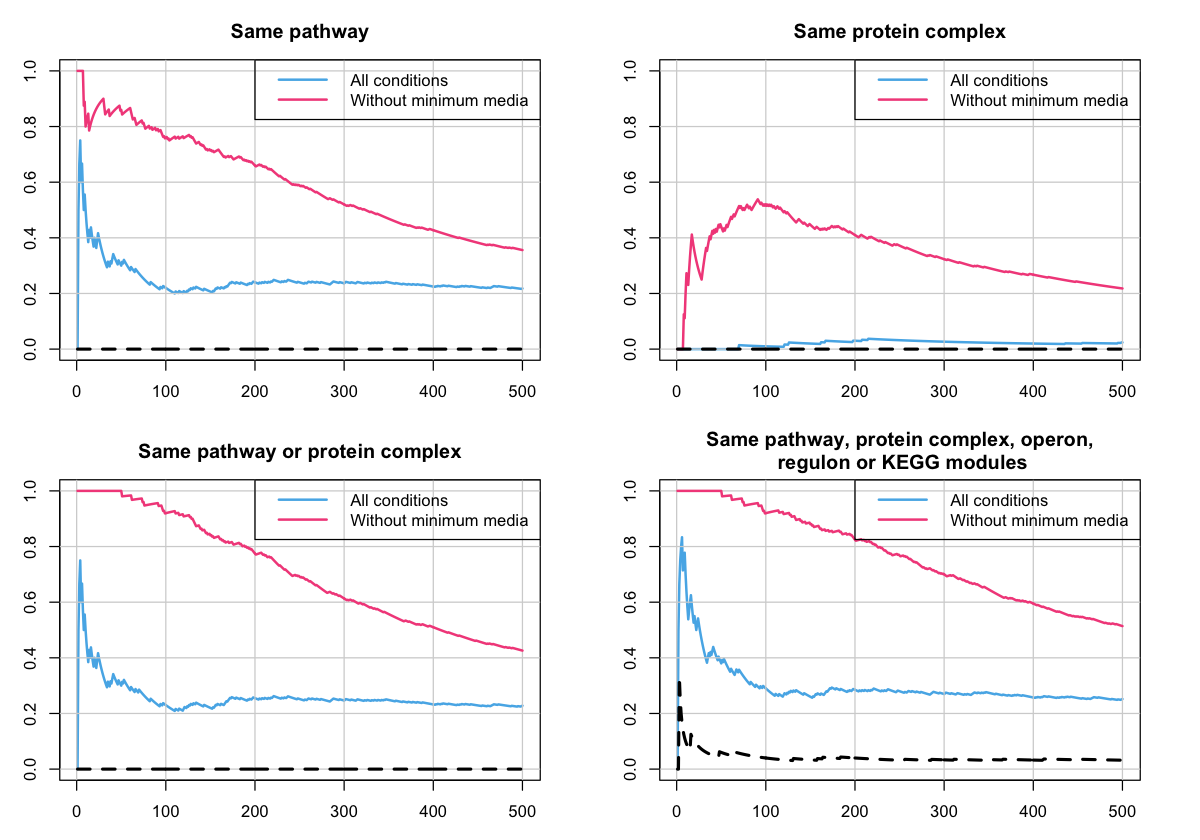

In [57]:
##compare: pwy - pwy with no minimum media, ptcomplex...., any annotation

##iterate through all parameters

#This uses the same combination of annotations as the violin plots
metric="precision" #this is a highly imbalanced dataset so I will not use accuracy or specificity
similarity="pcc"
samples=1:500
subset=500
cols=c("#56B4E9","#F3518A")
y=metric
ylim=c(0,1)
xlim=c(1,max(samples))
lwd=2
annot_list=list("Pwy","pcomplex",c("Pwy","pcomplex"),c("Pwy","pcomplex","operon","regulator","kegg_modules"))
annot_list_name=c("pathway","protein complex",
                  "pathway or protein complex",
                  "pathway, protein complex, operon,\n regulon or KEGG modules"
                 )

par(mfrow=c(2,2),mar=rep(3,4))
graph_corr_annot(metric,similarity,samples,subset,cols,ylim,xlim,lwd,annot_list,annot_list_name)

## Different similarity metrics

In [31]:
#This gets precison using the same combination of annotations as the violin plots
subset=500

#precalculate and subset to prevent memory problem
con1=get_confusionMatrix(c("Pwy","pcomplex","operon","regulator","kegg_modules"),"pcc",seed=1009)[1:subset,]
con2=get_confusionMatrix(c("Pwy","pcomplex","operon","regulator","kegg_modules"),"mi",seed=1009)[1:subset,]
con3=get_confusionMatrix(c("Pwy","pcomplex","operon","regulator","kegg_modules"),"mi_ternary",seed=1009)[1:subset,]

annot_list=list(con1,con2,con3)
names(annot_list)=c("PCC","MI","MI on ternary data")

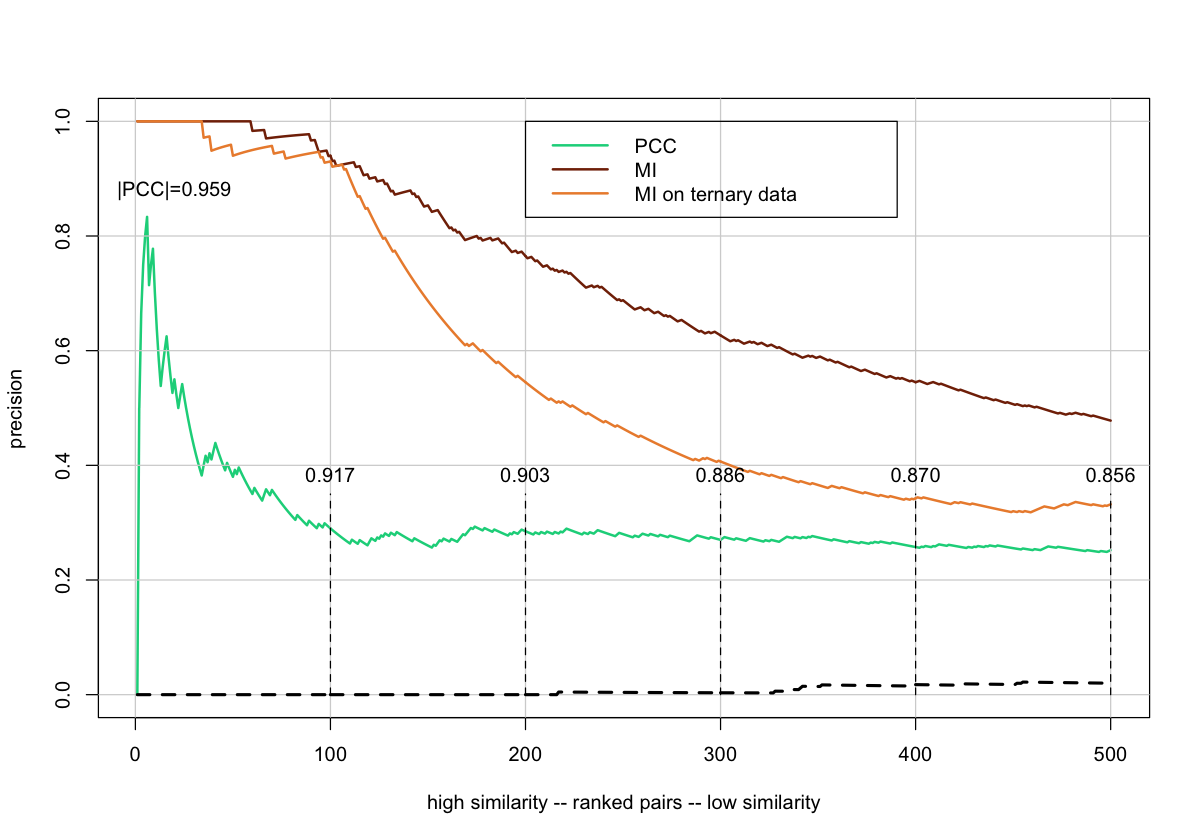

In [32]:
samples=1:500
cols=c("#09D38A","#832B05","#EC8D3A") 
metric="precision"
random_metric=paste0("random_",metric)
x_lab="high similarity -- ranked pairs -- low similarity"
y=metric
ylim=c(0,1)
xlim=c(1,max(samples))
lwd=2

options(repr.plot.width = 10, repr.plot.height = 7)


for(i in seq(annot_list)){
    if(i==1){
      plot(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,type='l',col=cols[i],
           ylim=ylim,xlim=xlim,lwd = lwd) 
    grid(lty='solid')
    }else{
      lines(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,col=cols[i],lwd = lwd) 
    }
    

}

legend(200, 1, legend=names(annot_list),
       col=cols, lty=1,lwd = lwd, cex=1) 

#add the negative control
lines(samples,annot_list[[1]][[random_metric]][samples],col='black',lty = 'dashed',lwd=2.5)

#add the annotations Dr. Siegele wants

##|PCC| for the 1st pair and 100, 200, 300... : 
##(1-sort(strain1strain2_allAnnotations_allDistances$pcc))[c(1,100,200,300,400,500)] %>% round(3)
##0.959 0.917 0.903 0.886 0.870 0.856


text(x=20,y=0.85,labels="|PCC|=0.959",pos=3)
text(x=100,y=0.35,labels="0.917",pos=3)
text(x=200,y=0.35,labels="0.903",pos=3)
text(x=300,y=0.35,labels="0.886",pos=3)
text(x=400,y=0.35,labels="0.870",pos=3)
text(x=500,y=0.35,labels="0.856",pos=3)

segments(100,0,100,0.35,lty=2)
segments(200,0,200,0.35,lty=2)
segments(300,0,300,0.35,lty=2)
segments(400,0,400,0.35,lty=2)
segments(500,0,500,0.35,lty=2)


#I have intuition that this graph should use "or" instead of "and". 
#Reasoning (junior high school math): using "and" will always drive down the precison, while if "or" is used:
##1. if annotations are good, precision goes up
##2. if annotations are bad, precision doesn't improve

In [33]:
#This gets precison using the same combination of annotations as the violin plots
subset=500

#precalculate and subset to prevent memory problem
con1=get_confusionMatrix(c("Pwy","pcomplex","operon","regulator","kegg_modules"),"pcc",seed=1009)[1:subset,]
con2=get_confusionMatrix(c("Pwy","pcomplex","operon","regulator","kegg_modules"),"mi")[1:subset,]
con3=get_confusionMatrix(c("Pwy","pcomplex","operon","regulator","kegg_modules"),"spearman")[1:subset,]

annot_list=list(con1,con2,con3)
names(annot_list)=c("PCC","MI","Spearman")

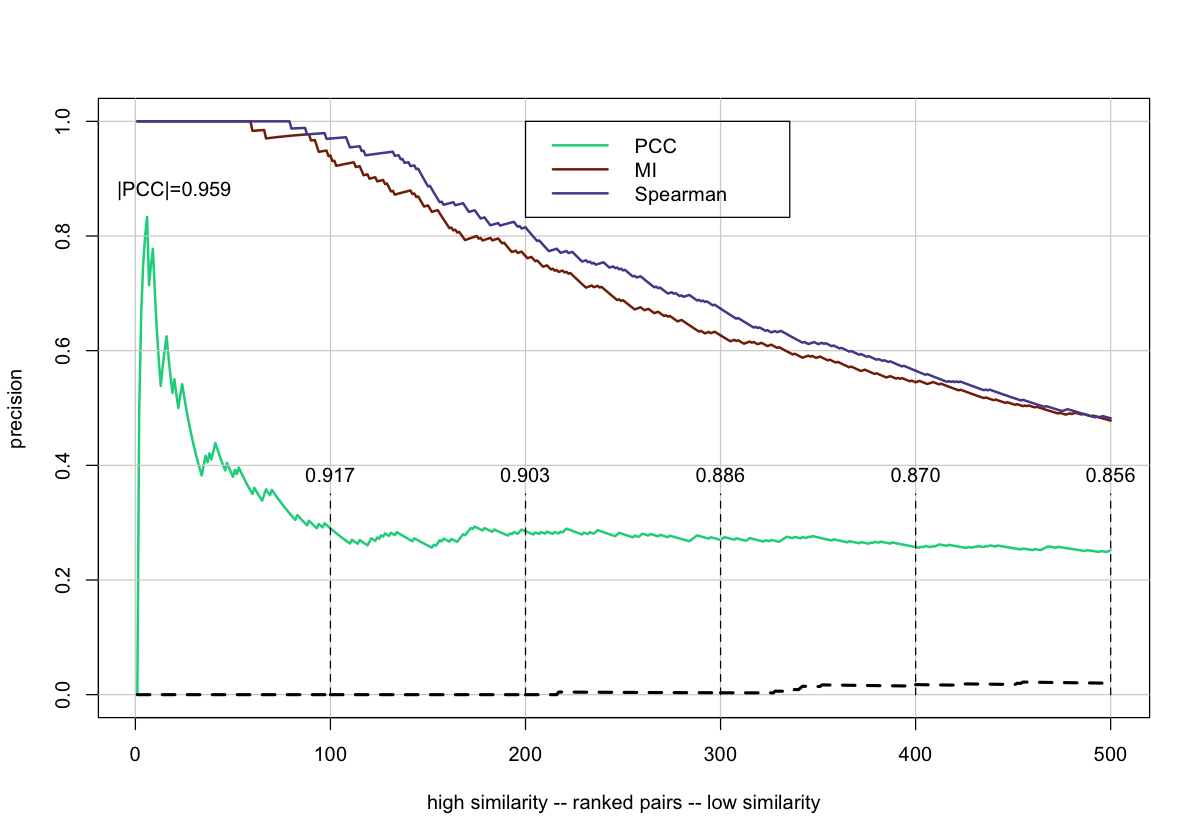

In [34]:
samples=1:500
cols=c("#09D38A","#832B05","#564c99")
metric="precision"
random_metric=paste0("random_",metric)
x_lab="high similarity -- ranked pairs -- low similarity"
y=metric
ylim=c(0,1)
xlim=c(1,max(samples))
lwd=2

options(repr.plot.width = 10, repr.plot.height = 7)


for(i in seq(annot_list)){
    if(i==1){
      plot(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,type='l',col=cols[i],
           ylim=ylim,xlim=xlim,lwd = lwd) 
    grid(lty='solid')
    }else{
      lines(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,col=cols[i],lwd = lwd) 
    }
    

}

legend(200, 1, legend=names(annot_list),
       col=cols, lty=1,lwd = lwd, cex=1) 

#add the negative control
lines(samples,annot_list[[1]][[random_metric]][samples],col='black',lty = 'dashed',lwd=2.5)


#add the annotations Dr. Siegele wants

##|PCC| for the 1st pair and 100, 200, 300... : 
##(1-sort(strain1strain2_allAnnotations_allDistances$pcc))[c(1,100,200,300,400,500)] %>% round(3)
##0.959 0.917 0.903 0.886 0.870 0.856


text(x=20,y=0.85,labels="|PCC|=0.959",pos=3)
text(x=100,y=0.35,labels="0.917",pos=3)
text(x=200,y=0.35,labels="0.903",pos=3)
text(x=300,y=0.35,labels="0.886",pos=3)
text(x=400,y=0.35,labels="0.870",pos=3)
text(x=500,y=0.35,labels="0.856",pos=3)

segments(100,0,100,0.35,lty=2)
segments(200,0,200,0.35,lty=2)
segments(300,0,300,0.35,lty=2)
segments(400,0,400,0.35,lty=2)
segments(500,0,500,0.35,lty=2)


#I have intuition that this graph should use "or" instead of "and". 
#Reasoning (junior high school math): using "and" will always drive down the precison, while if "or" is used:
##1. if annotations are good, precision goes up
##2. if annotations are bad, precision doesn't improve

## Boxplots on pathways and protein complexes

In [45]:
#This part requires manual work in ppt so I will just ignore